In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

In [2]:
df = pd.read_csv("/home/mbc/thesissatria/Dataset/CICIoT2023 rows 1814248 _39%, 38%, 38%, 60%, 35%, 30%, 3%, 3%, 3%.csv")

In [3]:
print("Jumlah data:", df.shape)
print("Jumlah kelas unik:", df['Attack Type'].nunique())
print("Distribusi kelas:\n", df['Attack Type'].value_counts())

Jumlah data: (1814248, 47)
Jumlah kelas unik: 9
Distribusi kelas:
 Attack Type
DDoS              1221567
DoS                361461
Mirai              118537
BENIGN              73194
Network Attack      24894
Recon               13429
Brute Force           546
Injection             481
Malware               139
Name: count, dtype: int64


In [4]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [5]:
print("Jumlah missing value per kolom:\n", df.isnull().sum())

Jumlah missing value per kolom:
 flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
A

In [7]:
df_clean = df.drop_duplicates().dropna()
print("Shape sesudah cleaning:", df_clean.shape)

Shape sesudah cleaning: (1814248, 47)


In [8]:
print('Nama Kolom :')
print(df_clean.columns)

Nama Kolom :
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight',
       'Attack Type'],
      dtype='object')


In [9]:
print("Jumlah data Clean:", df_clean.shape)
print("Jumlah kelas unik Clean:", df_clean['Attack Type'].nunique())
print("Distribusi kelas Clean:\n", df_clean['Attack Type'].value_counts())

Jumlah data Clean: (1814248, 47)
Jumlah kelas unik Clean: 9
Distribusi kelas Clean:
 Attack Type
DDoS              1221567
DoS                361461
Mirai              118537
BENIGN              73194
Network Attack      24894
Recon               13429
Brute Force           546
Injection             481
Malware               139
Name: count, dtype: int64


In [10]:
X = df_clean.drop(['Attack Type'], axis=1)
y = df_clean['Attack Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
size = len(X.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(X_scaled, len(X) // 500):
    ipca.partial_fit(batch)

transformed_features = ipca.transform(X_scaled)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = y.values

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 94.84%


In [12]:
print("Dataset Baru yang Sudah Mengalami PCA:\n")
new_data

Dataset Baru yang Sudah Mengalami PCA:



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,Attack Type
0,-1.154991,0.137022,1.885943,-0.254565,0.006871,1.659263,0.510935,-0.042632,0.715707,-0.102616,...,0.000657,-0.024338,-0.093986,-0.418432,0.241322,-0.222839,0.262951,-0.058702,0.068714,DDoS
1,-1.589870,6.502382,-3.231751,0.191503,0.000799,0.159509,-0.114555,0.005945,0.224822,0.103861,...,-0.001468,-0.022228,-0.107083,-0.288512,0.179503,-0.228818,0.048396,-0.104203,-0.089732,DDoS
2,-1.026096,0.290491,0.728053,-0.062225,0.007646,0.240815,-0.049278,-0.006139,-0.573592,-0.536420,...,0.009423,0.234872,1.032763,1.698779,-0.941880,0.999689,-0.441232,-0.364787,-0.368906,DDoS
3,-1.006120,-0.066803,0.415849,0.020608,0.007076,-0.051834,-0.154011,-0.004136,-0.254889,0.032141,...,-0.002488,-0.003306,0.010597,-0.196409,0.081478,0.308133,-0.649392,-0.946185,-0.840774,DDoS
4,0.819481,1.134897,2.114959,-0.902569,0.000994,-2.632088,-0.766459,0.006600,-1.917980,-2.247484,...,-0.004034,-0.090827,-0.392817,0.062797,-0.295320,1.772172,-1.021113,1.913760,0.527647,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814243,-1.006111,-0.066796,0.415865,0.020723,0.007077,-0.051865,-0.153945,-0.004136,-0.254871,0.032121,...,-0.002488,-0.003306,0.010595,-0.196406,0.081476,0.308139,-0.649388,-0.946185,-0.840775,DDoS
1814244,-0.601382,0.357800,1.631672,-0.537891,0.016713,-2.281367,-0.845822,-0.009920,-2.237391,-2.620732,...,-0.001042,-0.018612,-0.174651,-0.718630,0.363949,-0.294674,0.463778,0.096628,0.095111,DDoS
1814245,-0.941902,0.128242,1.690331,-0.211350,-0.004909,1.371764,0.416978,-0.032366,0.540789,0.000721,...,0.001823,-0.020481,-0.081501,-0.173268,0.095862,-0.486956,-0.044998,-0.237334,-0.158545,DDoS
1814246,-0.992557,-1.452523,-1.171001,0.504842,0.052653,-0.672364,-0.242242,0.028141,0.527003,0.230232,...,-0.019122,-0.001453,0.067605,-0.146018,0.098284,0.008290,0.034846,0.273320,0.152088,DDoS


In [13]:
print("Explained Variance per Component:")
for i, var in enumerate(ipca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

print(f"\nTotal Variansi Dijelaskan: {sum(ipca.explained_variance_ratio_):.2%}")

Explained Variance per Component:
PC1: 19.32%
PC2: 8.78%
PC3: 7.37%
PC4: 6.93%
PC5: 6.11%
PC6: 4.89%
PC7: 4.49%
PC8: 4.19%
PC9: 3.99%
PC10: 3.75%
PC11: 2.77%
PC12: 2.33%
PC13: 2.28%
PC14: 2.27%
PC15: 2.27%
PC16: 2.27%
PC17: 2.26%
PC18: 1.98%
PC19: 1.95%
PC20: 1.33%
PC21: 1.21%
PC22: 1.10%
PC23: 1.01%

Total Variansi Dijelaskan: 94.84%


In [14]:
# Menampilkan bobot (loading) semua fitur terhadap PC1
pc1_loadings = ipca.components_[0]  # Baris pertama adalah PC1
# Misal features.columns adalah list nama fitur asli
pc1_df = pd.DataFrame({
    'Feature': X.columns,
    'PC1_Weight': pc1_loadings
}).sort_values(by='PC1_Weight', key=abs, ascending=False)

print(pc1_df)


            Feature    PC1_Weight
35              Max  3.202635e-01
36              AVG  3.159870e-01
33          Tot sum  3.118950e-01
37              Std  3.075432e-01
42           Radius  3.074390e-01
41         Magnitue  3.062353e-01
38         Tot size  3.019861e-01
44         Variance  2.497717e-01
43       Covariance  2.200255e-01
34              Min  1.966897e-01
18        rst_count  1.953557e-01
1     Header_Length  1.872362e-01
20            HTTPS  1.604565e-01
3          Duration  1.471203e-01
11  ack_flag_number  1.328454e-01
17        urg_count  1.294127e-01
8   syn_flag_number -6.646465e-02
2     Protocol Type  5.607090e-02
9   rst_flag_number -4.633074e-02
7   fin_flag_number -4.625251e-02
39              IAT  4.479788e-02
40           Number  4.346639e-02
45           Weight  4.346571e-02
14        ack_count -3.939559e-02
16        fin_count -3.310340e-02
27              UDP -2.809395e-02
26              TCP -1.813018e-02
30             ICMP -1.124763e-02
10  psh_flag_n

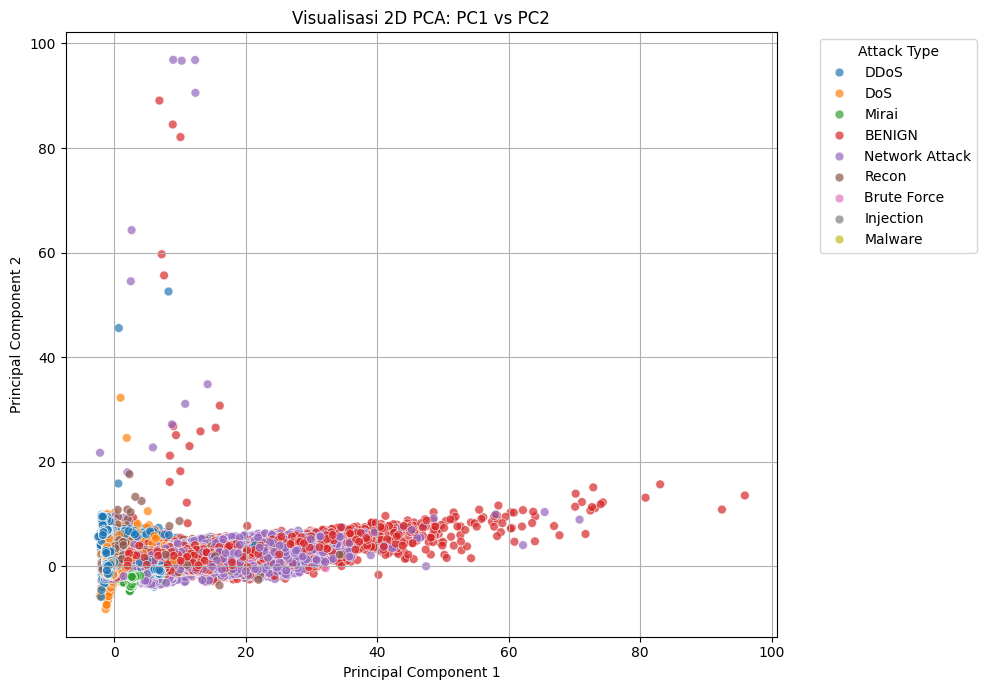

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=new_data,
    x='PC1', y='PC2',
    hue='Attack Type',
    palette='tab10',
    alpha=0.7,
    s=40
)
plt.title('Visualisasi 2D PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


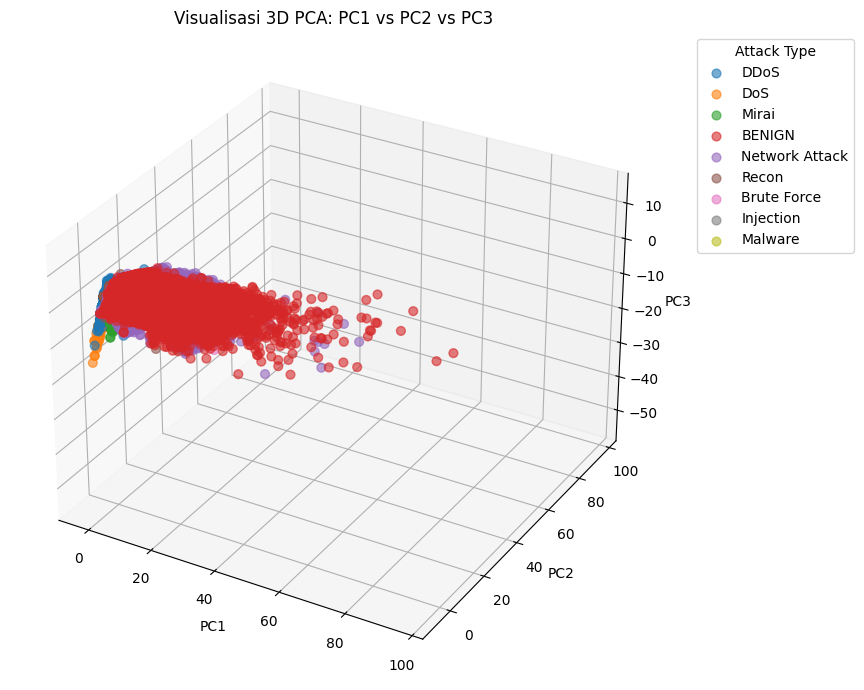

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Ambil warna unik untuk setiap label
labels = new_data['Attack Type'].unique()
colors = cm.tab10.colors

for i, label in enumerate(labels):
    subset = new_data[new_data['Attack Type'] == label]
    ax.scatter(
        subset['PC1'], subset['PC2'], subset['PC3'],
        label=label,
        color=colors[i % len(colors)],
        alpha=0.6,
        s=40
    )

ax.set_title('Visualisasi 3D PCA: PC1 vs PC2 vs PC3')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
print("Jumlah data IPCA 50% dari dataset sample 10%:", new_data.shape)
print("Jumlah kelas unik:", new_data['Attack Type'].nunique())
print("Distribusi kelas:\n", new_data['Attack Type'].value_counts())

Jumlah data IPCA 50% dari dataset sample 10%: (1814248, 24)
Jumlah kelas unik: 9
Distribusi kelas:
 Attack Type
DDoS              1221567
DoS                361461
Mirai              118537
BENIGN              73194
Network Attack      24894
Recon               13429
Brute Force           546
Injection             481
Malware               139
Name: count, dtype: int64


In [18]:
new_data.to_csv("CICIoT2023_noniid1IPCASTD10%.csv", index=False)
print("Dataset telah disimpan sebagai CICIoT2023_noniid1IPCASTD10%.csv")

Dataset telah disimpan sebagai CICIoT2023_noniid1IPCASTD10%.csv
